## 데이터 전처리 결과서

### 데이터 선정
1. Waze    
    - Waze는 이스라엘 Waze Mobile에서 만든 사용자 참여형 내비게이션 앱으로, GPS 기능이 있는 스마트폰 사용자들이 교통정보 및 도로정보를 실시간으로 공유하는 방식으로 운영된다.
    - 2022년 7월 기준, 전 세계적으로 1억 3천만명의 운전자가 사용하며, 6천만명이 지도를 편집하고, 3천만명이 자신이 사는 지역의 지도 정확성을 확인하는 관리자로 활동 중이다.
2. 선정 이유    
    - 사용자 참여로 운영되는 내비게이션 앱인만큼 사용자 이탈은 서비스 안정성과 성장에 있어 매우 중요한 요소
    - 사용자의 행동 패턴과 이탈 사이의 유의미한 상관관계를 도출함으로써 사용자 참여를 증대하고 이탈률을 낮추기 위한 개선 방안 수립 가능
    - 지도 앱의 사용자 경험을 최적화하고, 앱의 지속적인 성장을 지원할 수 있는 데이터 기반 인사이트 제공 가능
3. Dataset 설명
    - Waze 데이터셋은 Google Advanced Data Analytics Professional Certificate 프로그램의 일부로 제공되는 데이터셋
    - 앱 내에서 실제 사용자 행동을 시뮬레이션 하도록 설계
    - Waze와의 협력을 통해 제작된 합성 데이터로, 사용자 이탈을 분석하고 예측할 수 있는 다양한 요소를 포함

In [1]:
# imports
import pandas as pd
import numpy as np
from module.eda_visual import Visualizer
from module.preprocess import Preprocessor

In [2]:
# Dataset(id를 index로)
data = pd.read_csv("data/waze_dataset.csv", index_col=0)

### 탐색적 데이터 분석(Exploratory Data Analysis, EDA)

1. 데이터 구조
    - 총 14999개의 행, 13개의 열

In [3]:
data.head()

,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
ID,,,,,,,,,,,,
0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android


In [4]:
data.shape

(14999, 12)

2. columns
    - ID: 사용자 고유 식별자.
    - label: 사용자의 이탈 상태(예: churned: 이탈, retained: 유지).
    - sessions: 사용자가 기록한 세션 수.
    - drives: 사용자가 완료한 주행 수.
    - total_sessions: 사용자에 대해 기록된 전체 세션 수.
    - n_days_after_onboarding: 사용자 가입 이후 경과한 일수.
    - total_navigations_fav1: 즐겨찾기 경로 1을 사용한 총 네비게이션 횟수.
    - total_navigations_fav2: 즐겨찾기 경로 2를 사용한 총 네비게이션 횟수.
    - driven_km_drives: 사용자가 운전한 총 거리(Km).
    - duration_minutes_drives: 주행 시간의 총 길이(분).
    - activity_days: 사용자 활동이 기록된 총 일수.
    - driving_days: 운전 활동이 기록된 총 일수.
    - device: 사용자 사용 기기(예: Android, iPhone).

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14999 entries, 0 to 14998
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   label                    14299 non-null  object 
 1   sessions                 14999 non-null  int64  
 2   drives                   14999 non-null  int64  
 3   total_sessions           14999 non-null  float64
 4   n_days_after_onboarding  14999 non-null  int64  
 5   total_navigations_fav1   14999 non-null  int64  
 6   total_navigations_fav2   14999 non-null  int64  
 7   driven_km_drives         14999 non-null  float64
 8   duration_minutes_drives  14999 non-null  float64
 9   activity_days            14999 non-null  int64  
 10  driving_days             14999 non-null  int64  
 11  device                   14999 non-null  object 
dtypes: float64(3), int64(7), object(2)
memory usage: 1.5+ MB


3. 결측치 탐색
    - target label인 "label" 에서만 결측치가 발견

In [6]:
data.isnull().sum()

label                      700
sessions                     0
drives                       0
total_sessions               0
n_days_after_onboarding      0
total_navigations_fav1       0
total_navigations_fav2       0
driven_km_drives             0
duration_minutes_drives      0
activity_days                0
driving_days                 0
device                       0
dtype: int64

In [7]:
data["label"].value_counts()

label
retained    11763
churned      2536
Name: count, dtype: int64

4. 기초 통계 분석

In [8]:
data.describe()

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,80.633776,67.281152,189.964447,1749.837789,121.605974,29.672512,4039.340921,1860.976012,15.537102,12.179879
std,80.699065,65.913872,136.405128,1008.513876,148.121544,45.394651,2502.149334,1446.702288,9.004655,7.824036
min,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000
50%,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000
75%,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000
max,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


In [9]:
# 상관계수
data.select_dtypes(include="number").corr()

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
sessions,1.000000,0.996822,0.589079,0.005676,0.005713,0.006185,0.002113,-0.006113,0.024194,0.018973
drives,0.996822,1.000000,0.586741,0.005216,0.005017,0.007572,0.001883,-0.005855,0.024043,0.018847
total_sessions,0.589079,0.586741,1.000000,0.004731,0.002137,0.006421,-0.000416,-0.001689,0.013449,0.009912
n_days_after_onboarding,0.005676,0.005216,0.004731,1.000000,0.000435,-0.008075,-0.003213,-0.009646,-0.009725,-0.008563
total_navigations_fav1,0.005713,0.005017,0.002137,0.000435,1.000000,0.002306,-0.007690,0.002097,0.011066,0.010359
total_navigations_fav2,0.006185,0.007572,0.006421,-0.008075,0.002306,1.000000,0.000081,-0.004091,-0.004036,0.001951
driven_km_drives,0.002113,0.001883,-0.000416,-0.003213,-0.007690,0.000081,1.000000,0.697866,-0.002601,-0.005487
duration_minutes_drives,-0.006113,-0.005855,-0.001689,-0.009646,0.002097,-0.004091,0.697866,1.000000,-0.002830,-0.005145
activity_days,0.024194,0.024043,0.013449,-0.009725,0.011066,-0.004036,-0.002601,-0.002830,1.000000,0.947706
driving_days,0.018973,0.018847,0.009912,-0.008563,0.010359,0.001951,-0.005487,-0.005145,0.947706,1.000000


In [10]:
columns = [
    "sessions",
    "drives",
    "total_sessions",
    "n_days_after_onboarding",
    "total_navigations_fav1",
    "total_navigations_fav2",
    "driven_km_drives",
    "duration_minutes_drives",
    "activity_days",
    "driving_days",
]

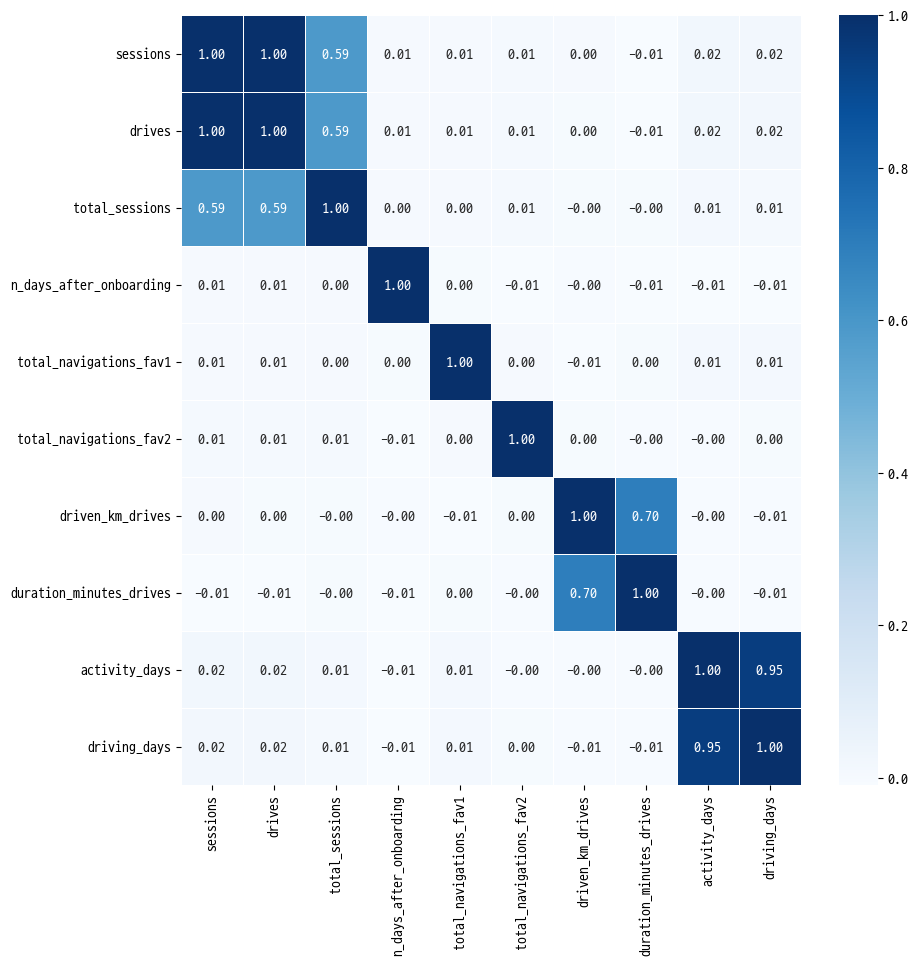

In [11]:
# 상관계수 시각화
visual = Visualizer(data, columns)
visual.corration_plot()

5. 시각화

In [12]:
%%writefile module/eda_visual.py
import seaborn as sns
import matplotlib.pyplot as plt


class Visualizer:
    def __init__(self, data, columns):
        self.data = data
        self.columns = columns
        
    def corration_plot(self):
        plt.figure(figsize=(10, 10))
        sns.heatmap(data=self.data.select_dtypes(include="number").corr(), annot=True, fmt=".2f", linewidths=0.5, cmap="Blues")
        plt.show()
        
    def target_plot(self):
        plt.figure(figsize=(12, 15))
        for i, col in enumerate(self.columns):
            if col != "device":
                plt.subplot(6, 2, i + 1)
                sns.kdeplot(
                    x=self.data[col],
                    data=self.data,
                    fill=True,
                    ec="gray",
                    fc="white",
                    legend=True,
                )
                sns.kdeplot(
                    x=self.data[col],
                    data=self.data,
                    hue=self.data["label"],
                    fill=True,
                    legend=True,
                )
            else:
                plt.subplot(6, 2, 11)
                sns.countplot(
                    x=self.data[col], data=self.data, fill=False, legend=False
                )
                sns.countplot(
                    x=self.data[col],
                    data=self.data,
                    hue=self.data["label"],
                    fill=True,
                    legend=False,
                )
        plt.suptitle("각 column 별 이탈 분포", fontsize=16)
        plt.tight_layout()
        plt.show()

    def feature_plot(self):
        plt.figure(figsize=(12, 15))
        for i, col in enumerate(self.columns):
            if col != "label":
                plt.subplot(6, 2, i + 1)
                self.data[col].hist()
                plt.grid(linestyle=":")
            else:
                plt.subplot(6, 2, 11)
                plt.pie(x=self.data[col].value_counts())
            plt.xlabel(col)
        plt.suptitle("각 column 별 분포", fontsize=16)
        plt.tight_layout()
        plt.show()

    def box_plot(self):
        plt.figure(figsize=(12, 15))
        for i, col in enumerate(self.columns):
            plt.subplot(5, 2, i + 1)
            plt.boxplot(self.data[col])
            plt.xlabel(col)
        plt.suptitle("각 column 별 box plot", fontsize=16)
        plt.tight_layout()
        plt.show()

Overwriting module/eda_visual.py


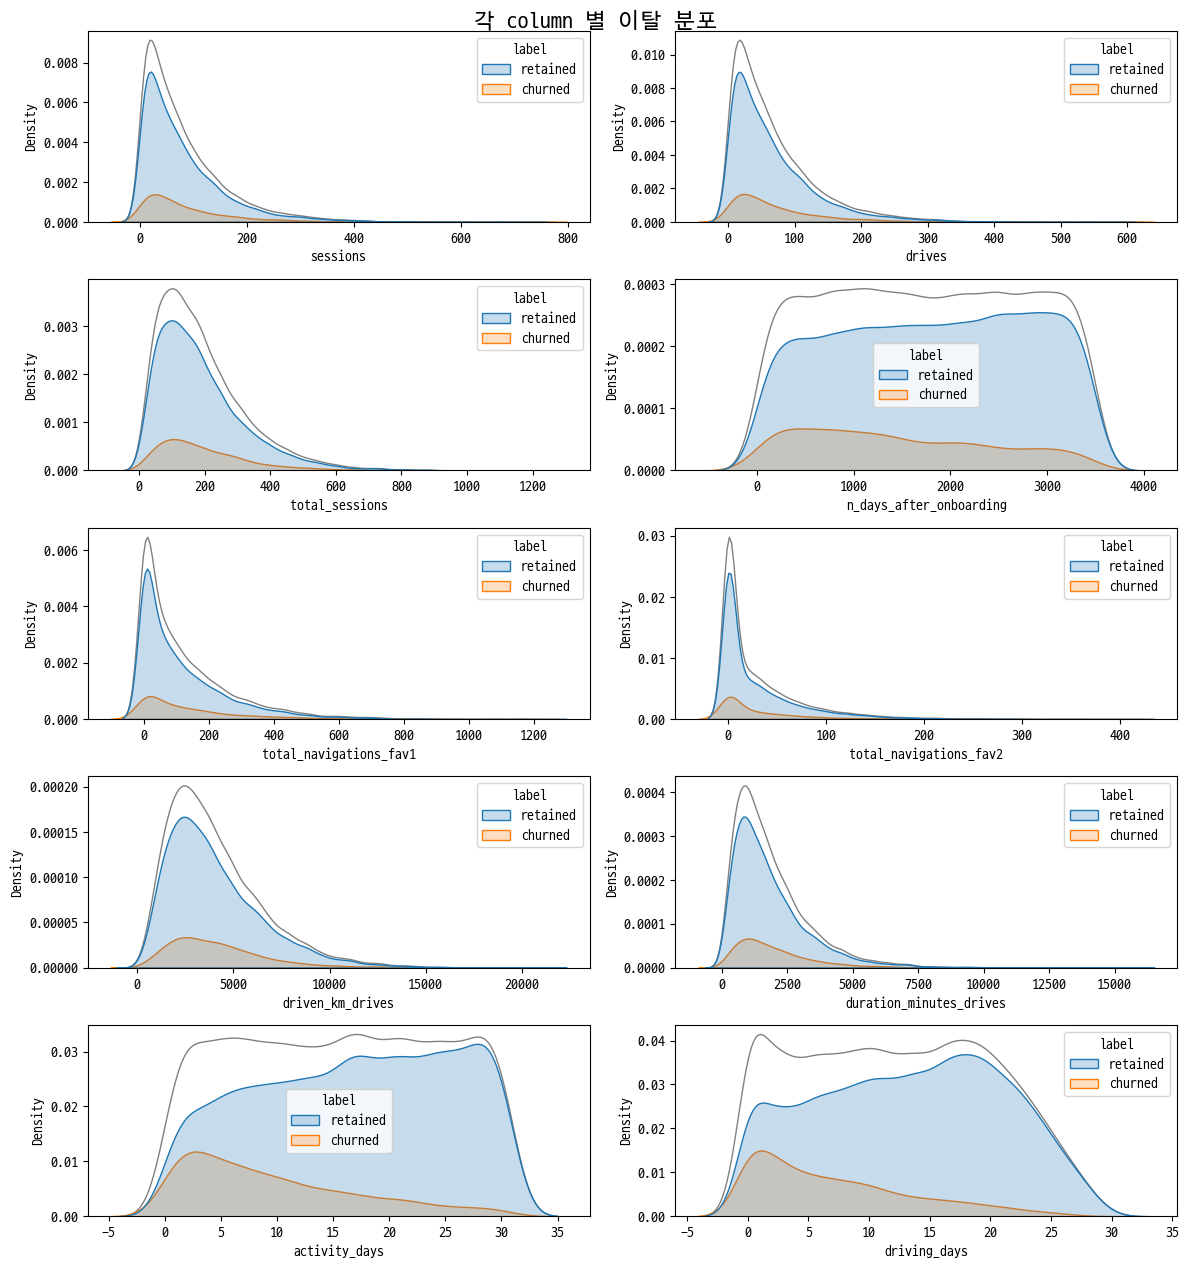

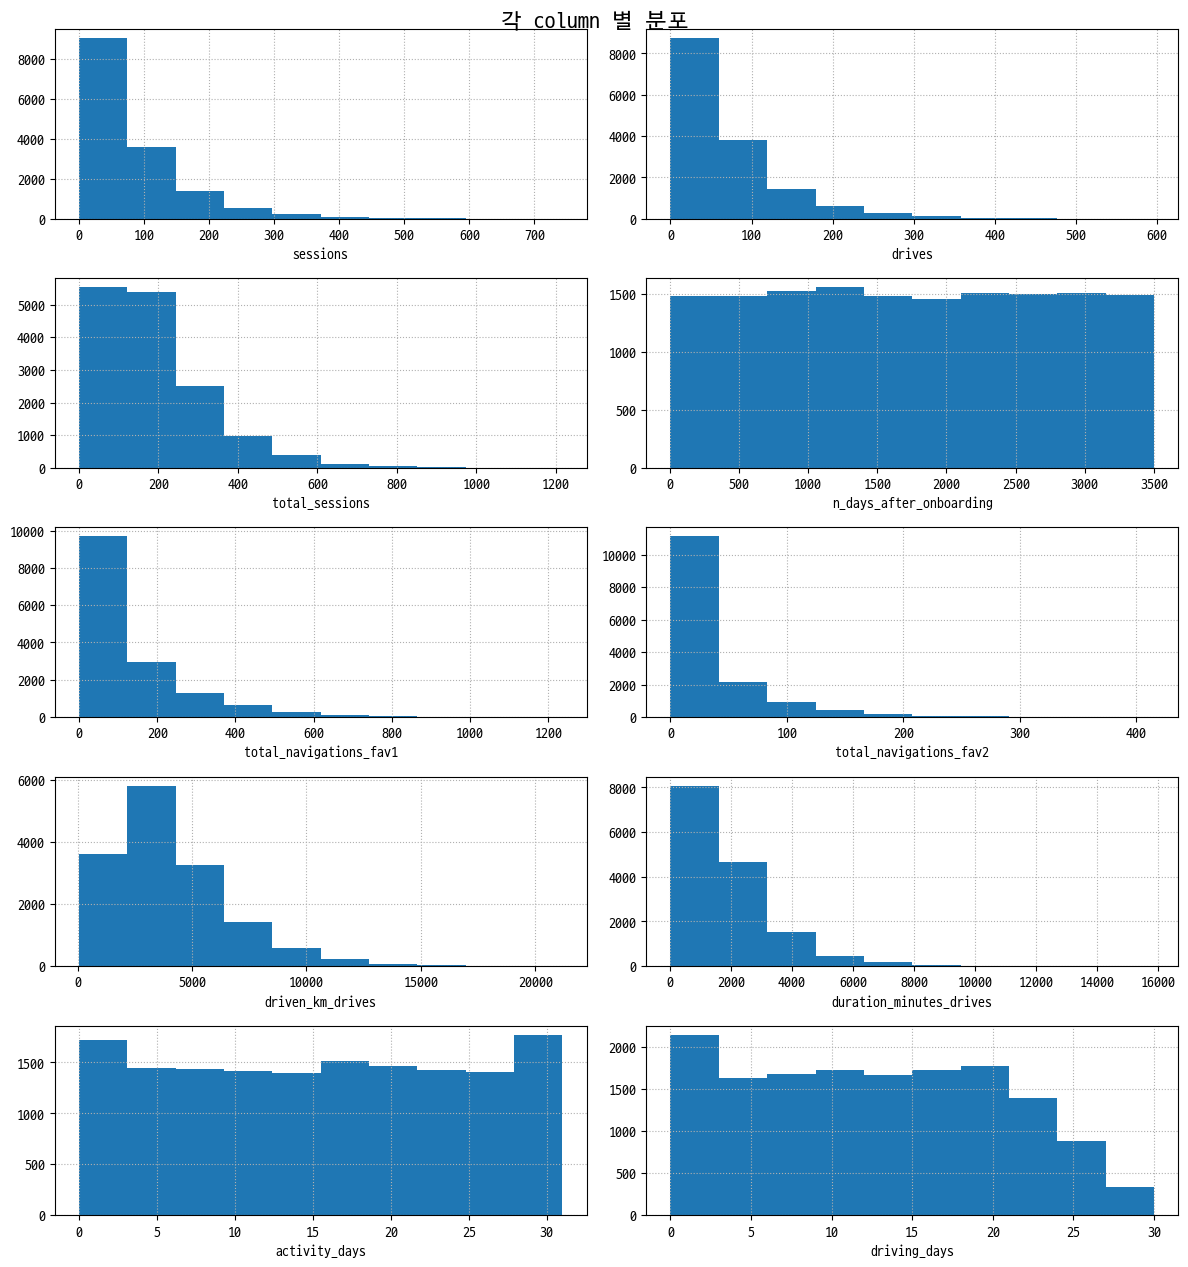

In [13]:
visual.target_plot()
visual.feature_plot()

### 전처리
1. 결측치
    - 결측치 처리 방법 및 이유
    - target 데이터인 label에서만 결측치가 있어 행 제거

In [14]:
data["label"].isnull().sum()  # 제거

np.int64(700)

2. 이상치
    - 이상치를 사분위수를 기준으로 판정하여
    - 1분위(100분위기준 25분위), 3분위(100분위 기준 75분위) 계산.
    - IQR(Inter Quartile Range) = 3분위수 - 1분위수 계산
    - 정상범위: q1 - 1.5 * iqr <= v <= q3 + 1.5 * iqr
    - 이상치를 정상범위로 처리한 결과 머신러닝에서 base model이 overfitting되는 상황이 발생
    - 분포에만 포함이 되지 않을 뿐 유의미한 데이터들로 간주

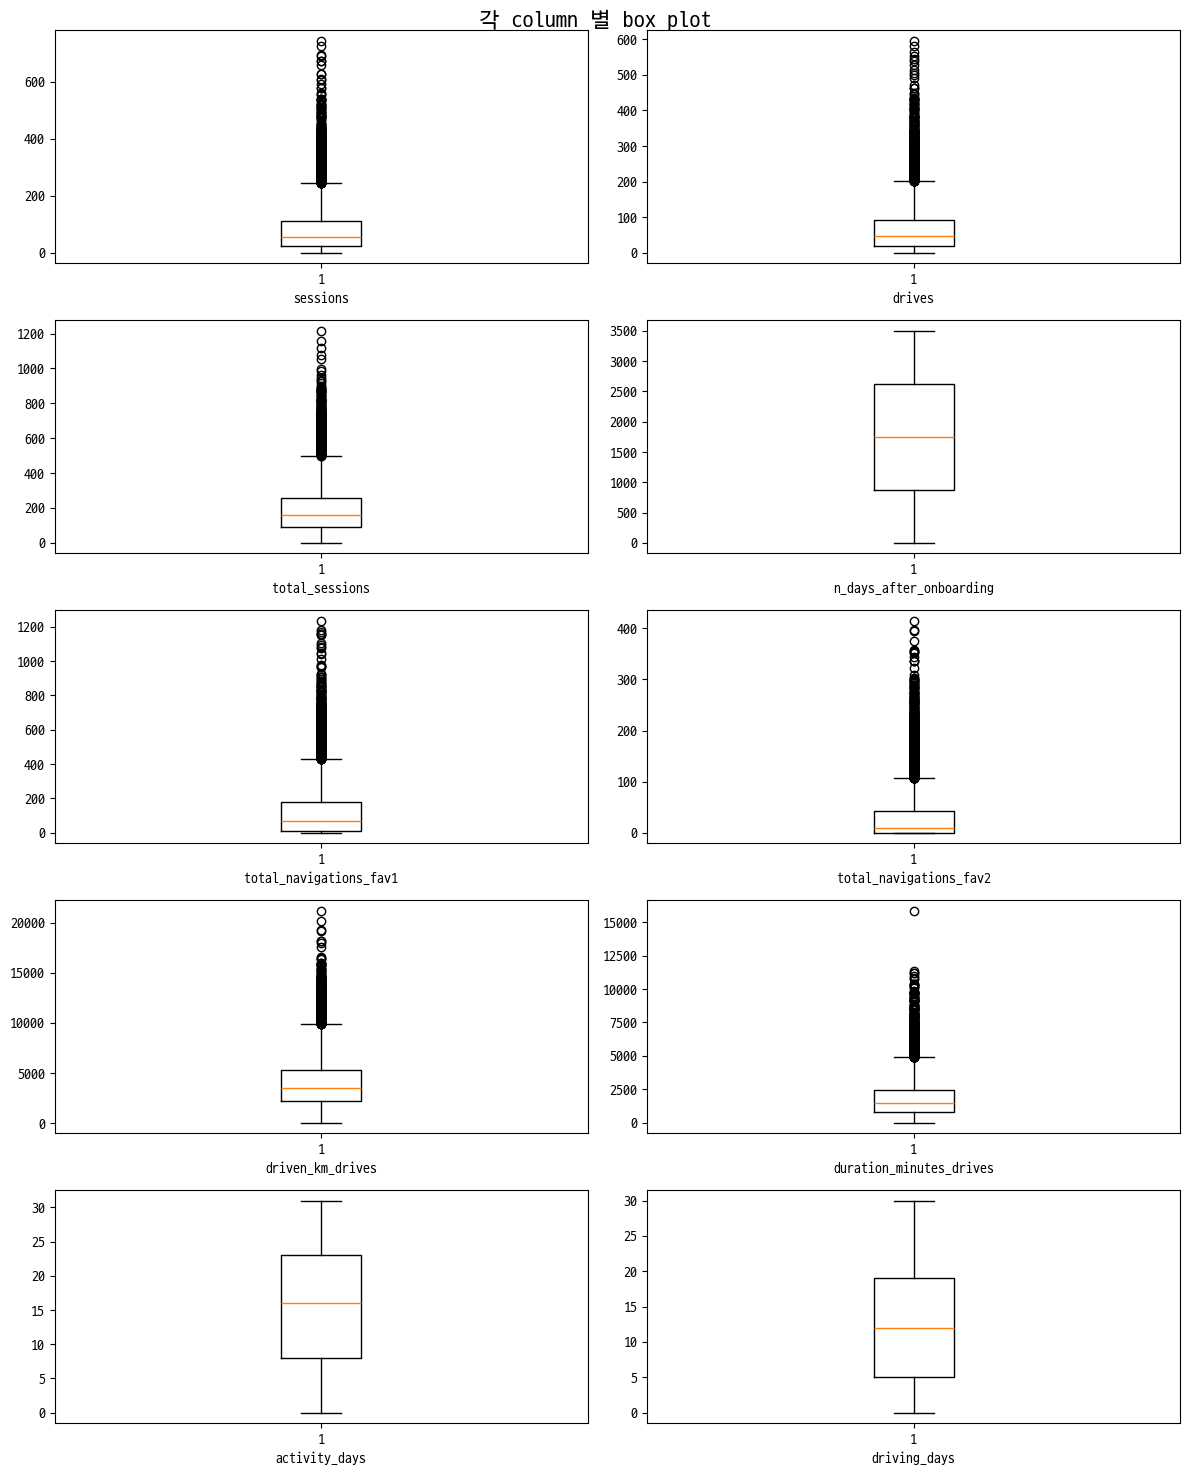

In [15]:
visual.box_plot()

3. Feature Engineering
    - 범주형: Label Encoding, One Hot Encoding
        - label: 타겟 데이터이므로 Lable Encoding 처리
        - device: One Hot Encoding 처리
    - 수치형: Standard Scaler

In [16]:
%%writefile module/preprocess.py
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd

class Preprocessor:
    def __init__(self, data):
        self.data = data

    def preprocess(self):
        # 결측치 삭제
        self.data.dropna(inplace=True)
        # label encoding
        l_encoder = LabelEncoder()
        self.data["label"] = l_encoder.fit_transform(self.data["label"])
        # one hot encoding
        self.data = pd.get_dummies(self.data, columns=["device"])
        return self.data

Overwriting module/preprocess.py


In [3]:
# preprocess
data = Preprocessor(data).preprocess()

In [6]:
# drives 이상치 제거 버전 추가
whis = 0.5
q1, q3 = data["drives"].quantile(q=[0.25, 0.75])
iqr = q3 - q1
iqr *= whis
drives_lower = q1 - 1.5 * iqr
drives_higher = q3 + 1.5 * iqr
data["drives"] = np.where(
    (data["drives"] > drives_higher), drives_higher, data["drives"]
)

In [8]:
# save propresed data
data.to_csv("data/preprocessed_drives_outlier.csv")